<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

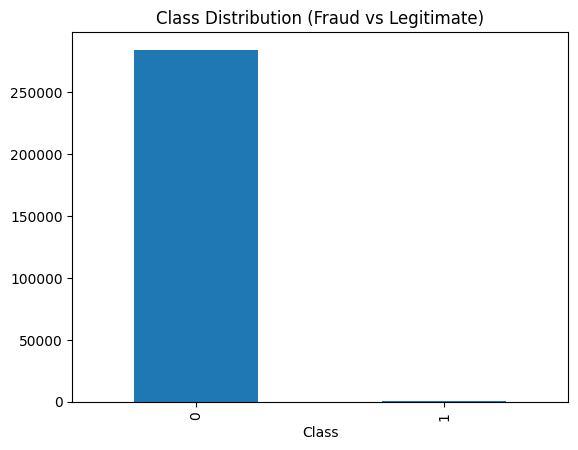

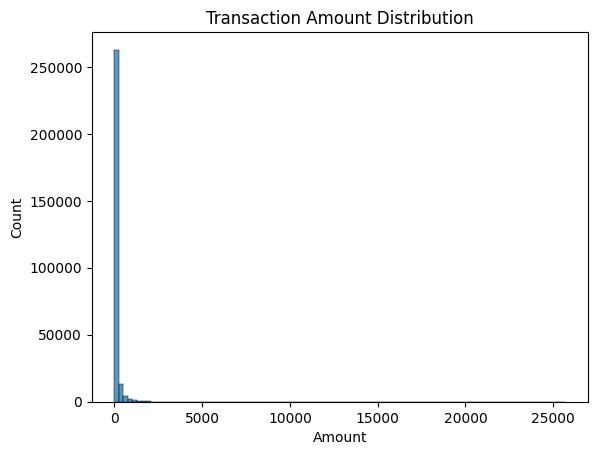

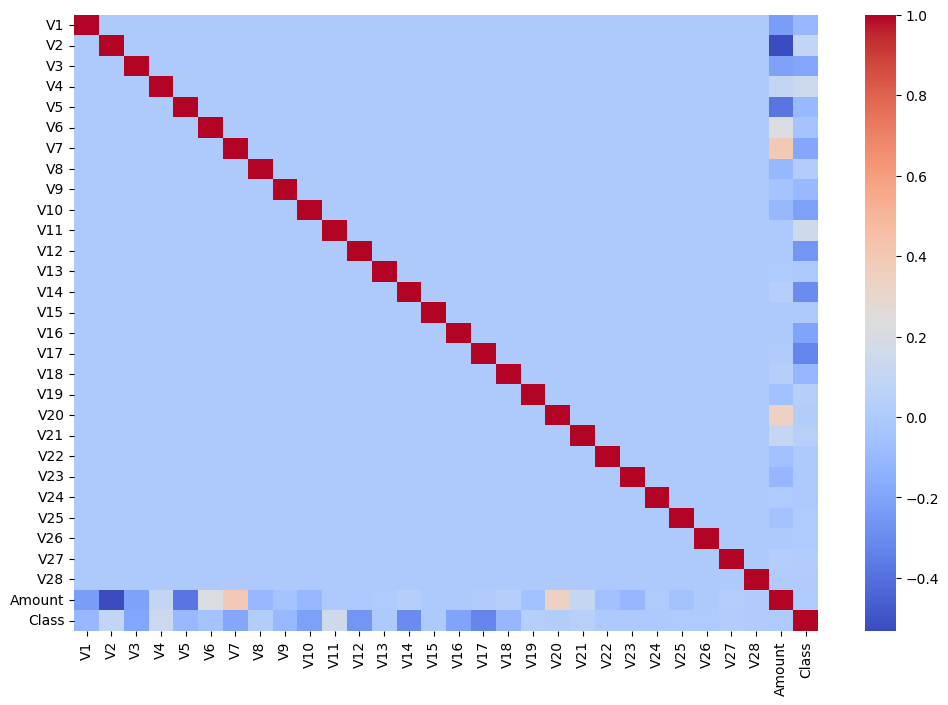

In [6]:
# EDA steps remain the same
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Dataset overview
dataset = pd.read_csv('/Users/olaluwoyeolalekantaofeek/Downloads/creditcard.csv')
dataset.info()

# Visualizing the class distribution
dataset['Class'].value_counts().plot(kind='bar')
plt.title('Class Distribution (Fraud vs Legitimate)')
plt.show()

# Plot feature distributions
sns.histplot(dataset['amount'], bins=100)
plt.title('Transaction amount Distribution')
plt.show()

# Drop irrelevant columns
dataset.drop(columns=['Time'], inplace=True)

# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dataset[['amount'] + [f'V{i}' for i in range(1, 29)]] = scaler.fit_transform(dataset[['amount'] + [f'V{i}' for i in range(1, 29)]])

# Correlation heatmap
corr_matrix = dataset.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.show()


In [2]:
import sys
print(sys.executable)

/Users/olaluwoyeolalekantaofeek/venvs/myenv/bin/python


In [7]:
print(dataset.head())  # Display first few rows of the dataset


         V1        V2        V3        V4        V5        V6        V7  \
0 -0.694242 -0.044075  1.672773  0.973366 -0.245117  0.347068  0.193679   
1  0.608496  0.161176  0.109797  0.316523  0.043483 -0.061820 -0.063700   
2 -0.693500 -0.811578  1.169468  0.268231 -0.364572  1.351454  0.639776   
3 -0.493325 -0.112169  1.182516 -0.609727 -0.007469  0.936150  0.192071   
4 -0.591330  0.531541  1.021412  0.284655 -0.295015  0.071999  0.479302   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.082637  0.331128  0.083386  ... -0.024923  0.382854 -0.176911  0.110507   
1  0.071253 -0.232494 -0.153350  ... -0.307377 -0.880077  0.162201 -0.561131   
2  0.207373 -1.378675  0.190700  ...  0.337632  1.063358  1.456320 -1.138092   
3  0.316018 -1.262503 -0.050468  ... -0.147443  0.007267 -0.304777 -1.941027   
4 -0.226510  0.744326  0.691625  ... -0.012839  1.100011 -0.220123  0.233250   

        V25       V26       V27       V28    amount  Class  
0  0.24

## Feature Engineering

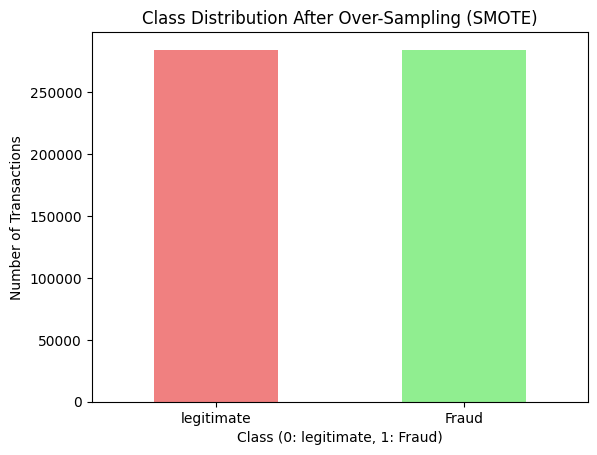

In [8]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Feature engineering
dataset['new_feature'] = dataset['amount'] * dataset['V1']  # Example feature

# One-hot encode categorical features
dataset = pd.get_dummies(dataset, drop_first=True)

# Define features (X) and target (y)
X = dataset.drop('Class', axis=1)
y = dataset['Class']

# Feature scaling
X_scaled = StandardScaler().fit_transform(X)

# Apply SMOTE (Synthetic Minority Over-sampling)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Plot the class distribution after resampling
y_resampled.value_counts().plot(kind='bar', color=['lightcoral', 'lightgreen'])
plt.title('Class Distribution After Over-Sampling (SMOTE)')
plt.xlabel('Class (0: legitimate, 1: Fraud)')
plt.ylabel('Number of Transactions')
plt.xticks([0, 1], ['legitimate', 'Fraud'], rotation=0)
plt.show()

# Now, you can train your model with X_resampled and y_resampled


## Model Development

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import IsolationForest
from sklearn.metrics import precision_score, recall_score, f1_score  # Importing the required metrics

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

# Initialize and train models

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# XGBoost Classifier
xgb = XGBClassifier(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)

# Neural Network (MLP Classifier)
mlp = MLPClassifier(max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# Isolation Forest (Anomaly Detection)
isoforest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
isoforest.fit(X_train)

# Evaluate each model

def evaluate_model(model, X_test, y_test):
    # For Isolation Forest, we need to convert the output to 0 for legitimate and 1 for fraud
    if isinstance(model, IsolationForest):
        y_pred = model.predict(X_test)
        y_pred = [1 if i == -1 else 0 for i in y_pred]  # Convert -1 to fraud (1) and 1 to legitimate (0)
    else:
        y_pred = model.predict(X_test)
        
    # Calculate Precision, Recall, and F1 Score
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return precision, recall, f1

# Evaluate Random Forest
rf_metrics = evaluate_model(rf, X_test, y_test)
print("Random Forest Metrics:", rf_metrics)

# Evaluate XGBoost
xgb_metrics = evaluate_model(xgb, X_test, y_test)
print("XGBoost Metrics:", xgb_metrics)

# Evaluate Neural Network (MLP)
mlp_metrics = evaluate_model(mlp, X_test, y_test)
print("MLP Metrics:", mlp_metrics)

# Evaluate Isolation Forest
isoforest_metrics = evaluate_model(isoforest, X_test, y_test)
print("Isolation Forest Metrics:", isoforest_metrics)


Random Forest Metrics: (0.9997890097524381, 1.0, 0.9998944937458236)
XGBoost Metrics: (0.9994141357330334, 1.0, 0.9997069820321381)
MLP Metrics: (0.9993790057061174, 1.0, 0.9996894064146365)
Isolation Forest Metrics: (0.9536650208887201, 0.23551480760663118, 0.37774309407848966)


In [22]:
# Display metrics for each model
metrics = {
    'Random Forest': rf_metrics,
    'XGBoost': xgb_metrics,
    'Neural Network': mlp_metrics,
    'Isolation Forest': isoforest_metrics
}

# Convert metrics to DataFrame for better visualization
metrics_df = pd.DataFrame(metrics).T
metrics_df.columns = ['Precision', 'Recall', 'F1-Score']
metrics_df

,Precision,Recall,F1-Score
Random Forest,0.999789,1.000000,0.999894
XGBoost,0.999414,1.000000,0.999707
Neural Network,0.999379,1.000000,0.999689
Isolation Forest,0.953665,0.235515,0.377743


## Hyperparameter Tuning

In [12]:
#from sklearn.model_selection import GridSearchCV
#from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier
#from sklearn.neural_network import MLPClassifier
#from sklearn.ensemble import IsolationForest

# Hyperparameter tuning for RandomForest
#param_grid_rf = {
 #   'n_estimators': [50, 100, 200],
 #   'max_depth': [3, 5, 10],
#}
#grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=3)
#grid_search_rf.fit(X_train, y_train)

# Print the best parameters for RandomForest
#print("Best parameters for RandomForest:", grid_search_rf.best_params_)

# Hyperparameter tuning for XGBoost
#param_grid_xgb = {
 #   'max_depth': [3, 5, 10],
  #  'learning_rate': [0.01, 0.1, 0.2],
   # 'n_estimators': [50, 100, 200],
#}
#grid_search_xgb = GridSearchCV(XGBClassifier(), param_grid_xgb, cv=3)
#grid_search_xgb.fit(X_train, y_train)

# Print the best parameters for XGBoost
#print("Best parameters for XGBoost:", grid_search_xgb.best_params_)

# Hyperparameter tuning for MLP
#param_grid_mlp = {
 #   'hidden_layer_sizes': [(50,), (100,), (100, 100)],
  #  'activation': ['relu', 'tanh'],
   # 'solver': ['adam', 'sgd'],
#}
#grid_search_mlp = GridSearchCV(MLPClassifier(max_iter=1000), param_grid_mlp, cv=3)
#grid_search_mlp.fit(X_train, y_train)

# Print the best parameters for MLP
#print("Best parameters for MLP:", grid_search_mlp.best_params_)

# Hyperparameter tuning for Isolation Forest
#param_grid_isoforest = {
 #   'n_estimators': [100, 150, 200],
  #  'contamination': [0.05, 0.1],
#}

# IsolationForest requires a slightly different approach, so we need to handle it carefully
#grid_search_isoforest = GridSearchCV(IsolationForest(), param_grid_isoforest, cv=3)
#grid_search_isoforest.fit(X_train)  # Note: IsolationForest does not need y_train, only X_train

# Print the best parameters for Isolation Forest
#print("Best parameters for IsolationForest:", grid_search_isoforest.best_params_)


## Model Evaluation

Random Forest AUC-PR: (0.999999535542333, 0.9999994424839901)
XGBoost AUC-PR: (0.9999980718615198, 0.9999980423303686)
MLP AUC-PR: (0.9999681810072709, 0.9999617063368483)
Isolation Forest AUC-PR: (0.612036083679041, 0.6068425893900494)


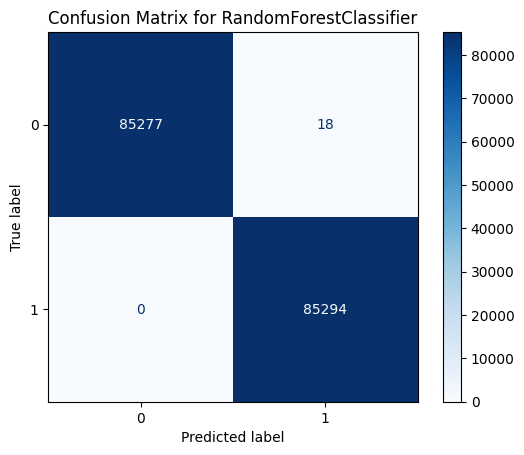

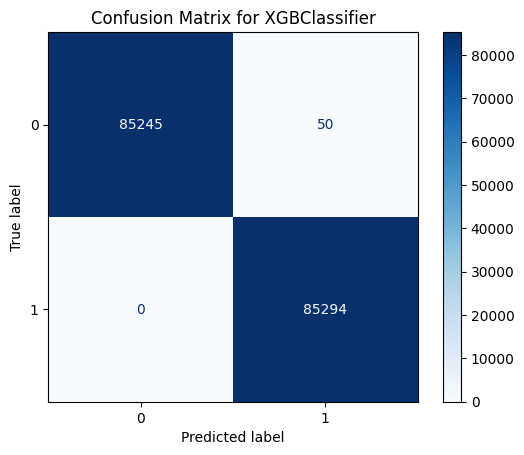

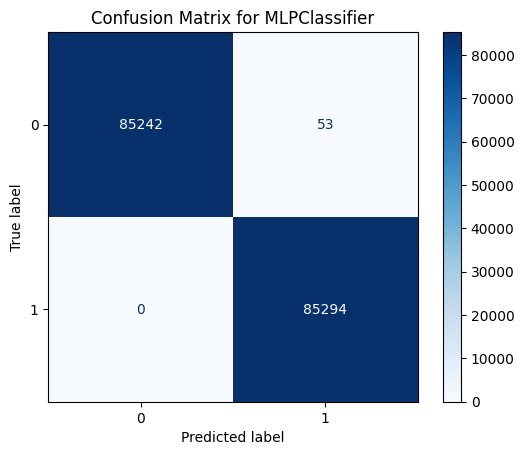

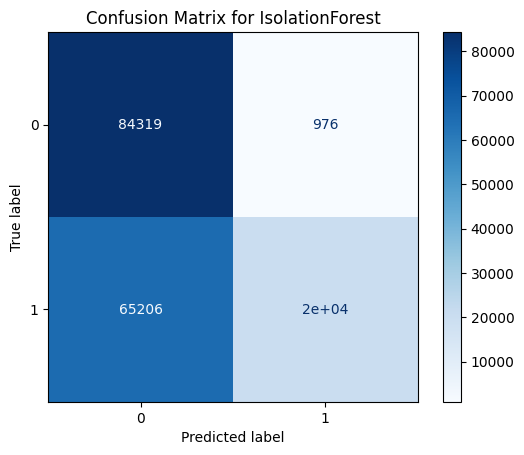

In [20]:
from sklearn.metrics import roc_auc_score, average_precision_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Function to evaluate ROC-AUC and PR-AUC for models
def evaluate_auc_pr_auc(model, X_test, y_test):
    if isinstance(model, IsolationForest):
        # Get anomaly scores from Isolation Forest
        y_pred_prob = model.decision_function(X_test)
        # Convert the scores to a binary prediction (1: Fraud, 0: Legitimate)
        y_pred_prob = [1 if score < 0 else 0 for score in y_pred_prob]  # Convert score to 1 (fraud) or 0 (legitimate)
    else:
        y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probability for positive class

    # Calculate ROC-AUC and PR-AUC
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    pr_auc = average_precision_score(y_test, y_pred_prob)
    return roc_auc, pr_auc

# Train and evaluate each model
rf_auc_pr_auc = evaluate_auc_pr_auc(rf, X_test, y_test)
xgb_auc_pr_auc = evaluate_auc_pr_auc(xgb, X_test, y_test)
mlp_auc_pr_auc = evaluate_auc_pr_auc(mlp, X_test, y_test)
isoforest_auc_pr_auc = evaluate_auc_pr_auc(isoforest, X_test, y_test)

# Display ROC-AUC and PR-AUC values
print("Random Forest AUC-PR:", rf_auc_pr_auc)
print("XGBoost AUC-PR:", xgb_auc_pr_auc)
print("MLP AUC-PR:", mlp_auc_pr_auc)
print("Isolation Forest AUC-PR:", isoforest_auc_pr_auc)

# Function to plot confusion matrix
def plot_confusion_matrix(model, X_test, y_test):
    if isinstance(model, IsolationForest):
        # For IsolationForest, we need to convert the output to 0 for legitimate and 1 for fraud
        y_pred = model.predict(X_test)
        y_pred = [1 if i == -1 else 0 for i in y_pred]  # Convert -1 to fraud (1) and 1 to legitimate (0)
    else:
        y_pred = model.predict(X_test)
        
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix for {model.__class__.__name__}')
    plt.show()

# Plot confusion matrix for each model
plot_confusion_matrix(rf, X_test, y_test)
plot_confusion_matrix(xgb, X_test, y_test)
plot_confusion_matrix(mlp, X_test, y_test)
plot_confusion_matrix(isoforest, X_test, y_test)


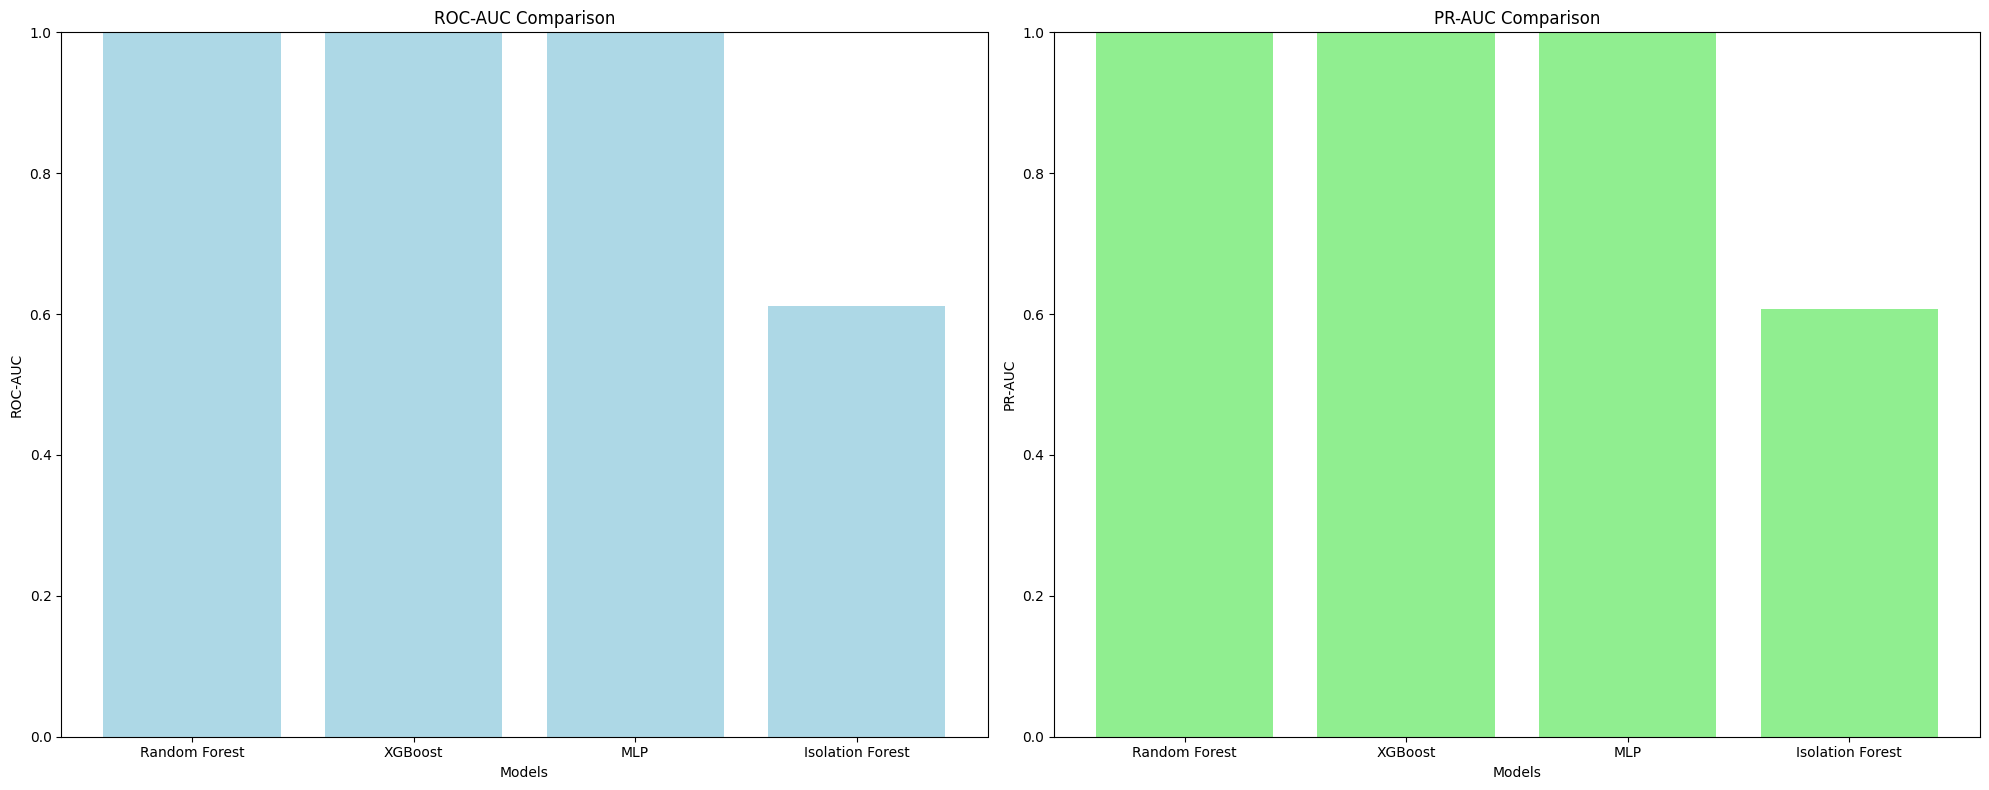

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Data: ROC-AUC and PR-AUC values
models = ['Random Forest', 'XGBoost', 'MLP', 'Isolation Forest']
roc_auc_scores = [rf_auc_pr_auc[0], xgb_auc_pr_auc[0], mlp_auc_pr_auc[0], isoforest_auc_pr_auc[0]]
pr_auc_scores = [rf_auc_pr_auc[1], xgb_auc_pr_auc[1], mlp_auc_pr_auc[1], isoforest_auc_pr_auc[1]]

# Create a bar chart for ROC-AUC and PR-AUC comparison
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

# ROC-AUC Bar Chart
ax[0].bar(models, roc_auc_scores, color='lightblue')
ax[0].set_title('ROC-AUC Comparison')
ax[0].set_xlabel('Models')
ax[0].set_ylabel('ROC-AUC')
ax[0].set_ylim(0, 1)

# PR-AUC Bar Chart
ax[1].bar(models, pr_auc_scores, color='lightgreen')
ax[1].set_title('PR-AUC Comparison')
ax[1].set_xlabel('Models')
ax[1].set_ylabel('PR-AUC')
ax[1].set_ylim(0, 1)

# Display the plot
plt.tight_layout()
plt.show()


In [17]:
from sklearn.model_selection import cross_val_score

# Random Forest
rf_cv = cross_val_score(rf, X_resampled, y_resampled, cv=3, scoring='roc_auc')
print("Random Forest Cross-Validation ROC-AUC:", rf_cv.mean())

# XGBoost
xgb_cv = cross_val_score(xgb, X_resampled, y_resampled, cv=3, scoring='roc_auc')
print("XGBoost Cross-Validation ROC-AUC:", xgb_cv.mean())

# Neural Network (MLP)
mlp_cv = cross_val_score(mlp, X_resampled, y_resampled, cv=3, scoring='roc_auc')
print("MLP Cross-Validation ROC-AUC:", mlp_cv.mean())

# Isolation Forest
isoforest_cv = cross_val_score(isoforest, X_resampled, y_resampled, cv=3, scoring='roc_auc')
print("Isolation Forest Cross-Validation ROC-AUC:", isoforest_cv.mean())


Random Forest Cross-Validation ROC-AUC: 0.9999319899589957
XGBoost Cross-Validation ROC-AUC: 0.9998979705817012
MLP Cross-Validation ROC-AUC: 0.9998074240633962


/Users/olaluwoyeolalekantaofeek/Downloads/fraud-detection-ml/.venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:839: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/olaluwoyeolalekantaofeek/Downloads/fraud-detection-ml/.venv/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/Users/olaluwoyeolalekantaofeek/Downloads/fraud-detection-ml/.venv/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 459, in _score
    y_pred = method_caller(clf, "decision_function", X, pos_label=pos_label)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/olaluwoyeolalekantaofeek/Downloads/fraud-detection-ml/.venv/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_response_va

Isolation Forest Cross-Validation ROC-AUC: nan


/Users/olaluwoyeolalekantaofeek/Downloads/fraud-detection-ml/.venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:839: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/olaluwoyeolalekantaofeek/Downloads/fraud-detection-ml/.venv/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/Users/olaluwoyeolalekantaofeek/Downloads/fraud-detection-ml/.venv/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 459, in _score
    y_pred = method_caller(clf, "decision_function", X, pos_label=pos_label)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/olaluwoyeolalekantaofeek/Downloads/fraud-detection-ml/.venv/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_response_va

In [ ]:
# Display metrics for each model
metrics = {
    'Logistic Regression': logreg_metrics,
    'Decision Tree': dtree_metrics,
    'Random Forest': rf_metrics,
    'XGBoost': xgb_metrics,
    'LightGBM': lgbm_metrics,
    'CatBoost': catboost_metrics,
    'Neural Network': mlp_metrics,
    'Isolation Forest': isoforest_metrics
}

# Convert metrics to DataFrame for better visualization
metrics_df = pd.DataFrame(metrics).T
metrics_df.columns = ['Precision', 'Recall', 'F1-Score']
metrics_df

Random Forest Metrics (Precision, Recall, F1): (0.9997714325901962, 1.0, 0.9998857032328401)
XGBoost Metrics (Precision, Recall, F1): (0.9993146110857264, 1.0, 0.9996571880631125)
MLP Metrics (Precision, Recall, F1): (0.9995078307640928, 1.0, 0.9997538548095012)


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].